# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [ ]:
# Import warnings
import warnings
warnings.filterwarnings("ignore")


In [ ]:
# Import the libraries you will be using for analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [295]:
# Try loading one file

# df = pd.read_parquet('2023-1.parquet')
# df.info()
import pandas as pd
df = pd.read_parquet('2023-3.parquet')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 3275796 entries, 0 to 3307233
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee            floa

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  3.275796e+06                     3275796                     3275796   
mean   1.734740e+00  2023-06-15 18:06:20.461846  2023-06-15 18:24:05.545134   
min    1.000000e+00         2002-12-31 23:03:19         2002-12-31 23:06:17   
25%    1.000000e+00  2023-06-08 09:09:51.500000         2023-06-08 09:27:12   
50%    2.000000e+00         2023-06-15 14:10:44         2023-06-15 14:31:23   
75%    2.000000e+00  2023-06-23 02:12:43.750000  2023-06-23 02:28:10.500000   
max    6.000000e+00         2023-07-01 00:42:13         2023-07-03 16:31:24   
std    4.491018e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     3.176486e+06   3.275796e+06  3.176486e+06  3.275796e+06   
mean      1.369032e+00   4.381530e+00  1.550669e+00  1.649418e+02   
min       0.000000e+00   0.000000e+00  1.000000e+00  1.000000e+00   
25%       1.000000e+00   1.090000e+00  1.000000e+00  1.320000e+02   
50%       1.000000e+00   1.820000e+00  1.000000e+00  1.610000e+02   
75%       1.000000e+00   3.540000e+00  1.000000e+00  2.330000e+02   
max       9.000000e+00   1.852505e+05  9.900000e+01  2.650000e+02   
std       8.970379e-01   2.291309e+02  6.794962e+00  6.404602e+01   

       DOLocationID  payment_type   fare_amount         extra       mta_tax  \
count  3.275796e+06  3.275796e+06  3.275796e+06  3.275796e+06  3.275796e+06   
mean   1.638509e+02  1.166850e+00  2.037903e+01  1.646348e+00  4.950577e-01   
min    1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00 -5.000000e-01   
25%    1.130000e+02  1.000000e+00  9.300000e+00  0.000000e+00  5.000000e-01   
50%    1.620000e+02  1.000000e+00  1.350000e+01  1.000000e+00  5.000000e-01   
75%    2.340000e+02  1.000000e+00  2.260000e+01  2.500000e+00  5.000000e-01   
max    2.650000e+02  5.000000e+00  3.869836e+05  1.425000e+01  5.750000e+00   
std    7.005871e+01  5.011792e-01  2.146368e+02  1.854487e+00  4.985039e-02   

         tip_amount  tolls_amount  improvement_surcharge  total_amount  \
count  3.275796e+06  3.275796e+06           3.275796e+06  3.275796e+06   
mean   3.628654e+00  6.173883e-01           9.992190e-01  2.959558e+01   
min    0.000000e+00  0.000000e+00          -1.000000e+00 -5.750000e+00   
25%    1.000000e+00  0.000000e+00           1.000000e+00  1.610000e+01   
50%    2.880000e+00  0.000000e+00           1.000000e+00  2.136000e+01   
75%    4.500000e+00  0.000000e+00           1.000000e+00  3.144000e+01   
max    7.118800e+02  6.655600e+02           1.000000e+00  3.869876e+05   
std    4.204040e+00  2.247881e+00           2.749851e-02  2.150953e+02   

       congestion_surcharge   Airport_fee  
count          3.176486e+06  3.176486e+06  
mean           2.304195e+00  1.571481e-01  
min           -2.500000e+00 -1.750000e+00  
25%            2.500000e+00  0.000000e+00  
50%            2.500000e+00  0.000000e+00  
75%            2.500000e+00  0.000000e+00  
max            2.500000e+00  1.750000e+00  
std            6.719841e-01  5.003869e-01

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [297]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os
import pandas as pd

# Change directory to where the parquet files are stored
os.chdir(r'C:\Users\aryan\Downloads\Datasets and Dictionary\trip_records')

# Get only .parquet files and ignore system files
file_list = [f for f in os.listdir() if f.endswith('.parquet') and os.path.isfile(f)]

# Initialize final dataframe
df = pd.DataFrame()

for file_name in file_list:
    try:
        file_path = os.path.join(os.getcwd(), file_name)
        print(f"Processing: {file_path}")

        # Read parquet file
        data = pd.read_parquet(file_path)

        # Ensure datetime column exists and is of datetime type
        if 'tpep_pickup_datetime' not in data.columns:
            print(f"Skipped {file_name} - Missing 'tpep_pickup_datetime'")
            continue

        if not pd.api.types.is_datetime64_any_dtype(data['tpep_pickup_datetime']):
            data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'], errors='coerce')

        # Drop rows with invalid datetime
        data = data.dropna(subset=['tpep_pickup_datetime'])

        # Extract date and hour
        data['pickup_date'] = data['tpep_pickup_datetime'].dt.date
        data['pickup_hour'] = data['tpep_pickup_datetime'].dt.hour

        # Collect sampled data from each hour
        sampled_data = pd.DataFrame()
        for date_val in data['pickup_date'].unique():
            day_data = data[data['pickup_date'] == date_val]
            for hr in range(24):
                hr_data = day_data[day_data['pickup_hour'] == hr]
                if not hr_data.empty:
                    hr_sample = hr_data.sample(frac=0.05, random_state=42)
                    sampled_data = pd.concat([sampled_data, hr_sample], ignore_index=True)

        # Add to final dataframe
        df = pd.concat([df, sampled_data], ignore_index=True)

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

# Reset index and show result
df.reset_index(drop=True, inplace=True)
print(df.head())




Processing: C:\Users\aryan\Downloads\Datasets and Dictionary\trip_records\2023-1.parquet
Processing: C:\Users\aryan\Downloads\Datasets and Dictionary\trip_records\2023-10.parquet
Processing: C:\Users\aryan\Downloads\Datasets and Dictionary\trip_records\2023-11.parquet
Processing: C:\Users\aryan\Downloads\Datasets and Dictionary\trip_records\2023-12.parquet
Processing: C:\Users\aryan\Downloads\Datasets and Dictionary\trip_records\2023-2.parquet
Processing: C:\Users\aryan\Downloads\Datasets and Dictionary\trip_records\2023-3.parquet
Processing: C:\Users\aryan\Downloads\Datasets and Dictionary\trip_records\2023-4.parquet
Processing: C:\Users\aryan\Downloads\Datasets and Dictionary\trip_records\2023-5.parquet
Processing: C:\Users\aryan\Downloads\Datasets and Dictionary\trip_records\2023-6.parquet
Processing: C:\Users\aryan\Downloads\Datasets and Dictionary\trip_records\2023-7.parquet
Processing: C:\Users\aryan\Downloads\Datasets and Dictionary\trip_records\2023-8.parquet
Processing: C:\Use

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [299]:
# Store the df in csv/parquet
# df.to_parquet('')
df.to_parquet(r'C:\Users\aryan\Downloads\Datasets and Dictionary\trip_records.parquet')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [301]:
# Load the new data file
df= pd.read_parquet(r'C:\Users\aryan\Downloads\Datasets and Dictionary\trip_records.parquet')

In [303]:
# df.head()
df.head()


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN               None            66           107   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             2  ...      0.5        0.00           0.0   
1             1  ...      0.5        2.58           0.0   
2             2  ...      0.5        0.00           0.0   
3             2  ...      0.5        0.00           0.0   
4             0  ...      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         35.57                   NaN          NaN   

   pickup_date  pickup_hour Airport_fee  
0   2023-01-01            0         NaN  
1   2023-01-01            0         NaN  
2   2023-01-01            0         NaN  
3   2023-01-01            0         NaN  
4   2023-01-01            0         NaN  

[5 rows x 22 columns]

In [305]:
# df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections


**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [312]:
# Fix the index and drop any columns that are not needed
df = df.reset_index(drop=True)
df = df.drop(columns=['store_and_fwd_flag'], errors='ignore')
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 21 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  airport_fee            float64       
 18  pickup_date           

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  1.896400e+06                     1896400                     1896400   
mean   1.733026e+00  2023-07-02 19:59:52.930795  2023-07-02 20:17:18.919563   
min    1.000000e+00         2022-12-31 23:51:30         2022-12-31 23:56:06   
25%    1.000000e+00  2023-04-02 16:10:08.750000  2023-04-02 16:27:43.500000   
50%    2.000000e+00  2023-06-27 15:44:22.500000         2023-06-27 16:01:15   
75%    2.000000e+00         2023-10-06 19:37:45         2023-10-06 19:53:39   
max    6.000000e+00         2023-12-31 23:57:51         2024-01-01 20:50:55   
std    4.476401e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     1.831526e+06   1.896400e+06  1.831526e+06  1.896400e+06   
mean      1.369215e+00   3.858293e+00  1.634694e+00  1.652814e+02   
min       0.000000e+00   0.000000e+00  1.000000e+00  1.000000e+00   
25%       1.000000e+00   1.050000e+00  1.000000e+00  1.320000e+02   
50%       1.000000e+00   1.790000e+00  1.000000e+00  1.620000e+02   
75%       1.000000e+00   3.400000e+00  1.000000e+00  2.340000e+02   
max       9.000000e+00   1.263605e+05  9.900000e+01  2.650000e+02   
std       8.927560e-01   1.294085e+02  7.393915e+00  6.400038e+01   

       DOLocationID  payment_type   fare_amount         extra       mta_tax  \
count  1.896400e+06  1.896400e+06  1.896400e+06  1.896400e+06  1.896400e+06   
mean   1.640515e+02  1.163817e+00  1.991935e+01  1.588018e+00  4.952796e-01   
min    1.000000e+00  0.000000e+00  0.000000e+00 -2.500000e+00 -5.000000e-01   
25%    1.140000e+02  1.000000e+00  9.300000e+00  0.000000e+00  5.000000e-01   
50%    1.620000e+02  1.000000e+00  1.350000e+01  1.000000e+00  5.000000e-01   
75%    2.340000e+02  1.000000e+00  2.190000e+01  2.500000e+00  5.000000e-01   
max    2.650000e+02  4.000000e+00  1.431635e+05  2.080000e+01  4.000000e+00   
std    6.980207e+01  5.081384e-01  1.055371e+02  1.829200e+00  4.885128e-02   

         tip_amount  tolls_amount  improvement_surcharge  total_amount  \
count  1.896400e+06  1.896400e+06           1.896400e+06  1.896400e+06   
mean   3.547011e+00  5.965338e-01           9.989706e-01  2.898186e+01   
min    0.000000e+00  0.000000e+00          -1.000000e+00 -5.750000e+00   
25%    1.000000e+00  0.000000e+00           1.000000e+00  1.596000e+01   
50%    2.850000e+00  0.000000e+00           1.000000e+00  2.100000e+01   
75%    4.420000e+00  0.000000e+00           1.000000e+00  3.094000e+01   
max    2.230800e+02  1.430000e+02           1.000000e+00  1.431675e+05   
std    4.054882e+00  2.187878e+00           3.112072e-02  1.064162e+02   

       congestion_surcharge    airport_fee   pickup_hour   Airport_fee  
count          1.831526e+06  148483.000000  1.896400e+06  1.683043e+06  
mean           2.307524e+00       0.109036  1.426504e+01  1.458850e-01  
min           -2.500000e+00      -1.250000  0.000000e+00 -1.750000e+00  
25%            2.500000e+00       0.000000  1.100000e+01  0.000000e+00  
50%            2.500000e+00       0.000000  1.500000e+01  0.000000e+00  
75%            2.500000e+00       0.000000  1.900000e+01  0.000000e+00  
max            2.500000e+00       1.250000  2.300000e+01  1.750000e+00  
std            6.667267e-01       0.352744  5.807381e+00  4.733757e-01

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [316]:
# Combine the two airport fee columns
cols = ['airport_fee', 'Airport_fee']
df['Airport_fee'] = df[cols].fillna(0).sum(axis=1) if all(c in df.columns for c in cols) else df.get('airport_fee') or df.get('Airport_fee')
df.drop(columns=[c for c in cols if c in df.columns and c != 'Airport_fee'], inplace=True)
df.describe()


VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  1.896400e+06                     1896400                     1896400   
mean   1.733026e+00  2023-07-02 19:59:52.930795  2023-07-02 20:17:18.919563   
min    1.000000e+00         2022-12-31 23:51:30         2022-12-31 23:56:06   
25%    1.000000e+00  2023-04-02 16:10:08.750000  2023-04-02 16:27:43.500000   
50%    2.000000e+00  2023-06-27 15:44:22.500000         2023-06-27 16:01:15   
75%    2.000000e+00         2023-10-06 19:37:45         2023-10-06 19:53:39   
max    6.000000e+00         2023-12-31 23:57:51         2024-01-01 20:50:55   
std    4.476401e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     1.831526e+06   1.896400e+06  1.831526e+06  1.896400e+06   
mean      1.369215e+00   3.858293e+00  1.634694e+00  1.652814e+02   
min       0.000000e+00   0.000000e+00  1.000000e+00  1.000000e+00   
25%       1.000000e+00   1.050000e+00  1.000000e+00  1.320000e+02   
50%       1.000000e+00   1.790000e+00  1.000000e+00  1.620000e+02   
75%       1.000000e+00   3.400000e+00  1.000000e+00  2.340000e+02   
max       9.000000e+00   1.263605e+05  9.900000e+01  2.650000e+02   
std       8.927560e-01   1.294085e+02  7.393915e+00  6.400038e+01   

       DOLocationID  payment_type   fare_amount         extra       mta_tax  \
count  1.896400e+06  1.896400e+06  1.896400e+06  1.896400e+06  1.896400e+06   
mean   1.640515e+02  1.163817e+00  1.991935e+01  1.588018e+00  4.952796e-01   
min    1.000000e+00  0.000000e+00  0.000000e+00 -2.500000e+00 -5.000000e-01   
25%    1.140000e+02  1.000000e+00  9.300000e+00  0.000000e+00  5.000000e-01   
50%    1.620000e+02  1.000000e+00  1.350000e+01  1.000000e+00  5.000000e-01   
75%    2.340000e+02  1.000000e+00  2.190000e+01  2.500000e+00  5.000000e-01   
max    2.650000e+02  4.000000e+00  1.431635e+05  2.080000e+01  4.000000e+00   
std    6.980207e+01  5.081384e-01  1.055371e+02  1.829200e+00  4.885128e-02   

         tip_amount  tolls_amount  improvement_surcharge  total_amount  \
count  1.896400e+06  1.896400e+06           1.896400e+06  1.896400e+06   
mean   3.547011e+00  5.965338e-01           9.989706e-01  2.898186e+01   
min    0.000000e+00  0.000000e+00          -1.000000e+00 -5.750000e+00   
25%    1.000000e+00  0.000000e+00           1.000000e+00  1.596000e+01   
50%    2.850000e+00  0.000000e+00           1.000000e+00  2.100000e+01   
75%    4.420000e+00  0.000000e+00           1.000000e+00  3.094000e+01   
max    2.230800e+02  1.430000e+02           1.000000e+00  1.431675e+05   
std    4.054882e+00  2.187878e+00           3.112072e-02  1.064162e+02   

       congestion_surcharge   pickup_hour   Airport_fee  
count          1.831526e+06  1.896400e+06  1.896400e+06  
mean           2.307524e+00  1.426504e+01  1.380093e-01  
min           -2.500000e+00  0.000000e+00 -1.750000e+00  
25%            2.500000e+00  1.100000e+01  0.000000e+00  
50%            2.500000e+00  1.500000e+01  0.000000e+00  
75%            2.500000e+00  1.900000e+01  0.000000e+00  
max            2.500000e+00  2.300000e+01  1.750000e+00  
std            6.667267e-01  5.807381e+00  4.575896e-01

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [322]:
# check where values of fare amount are negative
df[df[ "fare_amount" ] < 0.0] 

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, pickup_date, pickup_hour, Airport_fee]
Index: []

Did you notice something different in the `RatecodeID` column for above records?

In [324]:
# Analyse RatecodeID for the negative fare amounts
df[df["fare_amount"] < 0.0]["RatecodeID"].value_counts() 


Series([], Name: count, dtype: int64)

In [328]:
# Find which columns have negative values
print("Columns with negative values:", [col for col in df.select_dtypes(include='number') if (df[col] < 0).any()])

Columns with negative values: ['extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee']


In [332]:
# fix these negative values
# Negative values to abs() or positive values.
df[df.select_dtypes(include='number').columns] = df.select_dtypes(include='number').apply(lambda x: x.abs())
df.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  1.896400e+06                     1896400                     1896400   
mean   1.733026e+00  2023-07-02 19:59:52.930795  2023-07-02 20:17:18.919563   
min    1.000000e+00         2022-12-31 23:51:30         2022-12-31 23:56:06   
25%    1.000000e+00  2023-04-02 16:10:08.750000  2023-04-02 16:27:43.500000   
50%    2.000000e+00  2023-06-27 15:44:22.500000         2023-06-27 16:01:15   
75%    2.000000e+00         2023-10-06 19:37:45         2023-10-06 19:53:39   
max    6.000000e+00         2023-12-31 23:57:51         2024-01-01 20:50:55   
std    4.476401e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     1.831526e+06   1.896400e+06  1.831526e+06  1.896400e+06   
mean      1.369215e+00   3.858293e+00  1.634694e+00  1.652814e+02   
min       0.000000e+00   0.000000e+00  1.000000e+00  1.000000e+00   
25%       1.000000e+00   1.050000e+00  1.000000e+00  1.320000e+02   
50%       1.000000e+00   1.790000e+00  1.000000e+00  1.620000e+02   
75%       1.000000e+00   3.400000e+00  1.000000e+00  2.340000e+02   
max       9.000000e+00   1.263605e+05  9.900000e+01  2.650000e+02   
std       8.927560e-01   1.294085e+02  7.393915e+00  6.400038e+01   

       DOLocationID  payment_type   fare_amount         extra       mta_tax  \
count  1.896400e+06  1.896400e+06  1.896400e+06  1.896400e+06  1.896400e+06   
mean   1.640515e+02  1.163817e+00  1.991935e+01  1.588022e+00  4.953181e-01   
min    1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.140000e+02  1.000000e+00  9.300000e+00  0.000000e+00  5.000000e-01   
50%    1.620000e+02  1.000000e+00  1.350000e+01  1.000000e+00  5.000000e-01   
75%    2.340000e+02  1.000000e+00  2.190000e+01  2.500000e+00  5.000000e-01   
max    2.650000e+02  4.000000e+00  1.431635e+05  2.080000e+01  4.000000e+00   
std    6.980207e+01  5.081384e-01  1.055371e+02  1.829196e+00  4.845942e-02   

         tip_amount  tolls_amount  improvement_surcharge  total_amount  \
count  1.896400e+06  1.896400e+06           1.896400e+06  1.896400e+06   
mean   3.547011e+00  5.965338e-01           9.990529e-01  2.898216e+01   
min    0.000000e+00  0.000000e+00           0.000000e+00  0.000000e+00   
25%    1.000000e+00  0.000000e+00           1.000000e+00  1.596000e+01   
50%    2.850000e+00  0.000000e+00           1.000000e+00  2.100000e+01   
75%    4.420000e+00  0.000000e+00           1.000000e+00  3.094000e+01   
max    2.230800e+02  1.430000e+02           1.000000e+00  1.431675e+05   
std    4.054882e+00  2.187878e+00           2.835735e-02  1.064161e+02   

       congestion_surcharge   pickup_hour   Airport_fee  
count          1.831526e+06  1.896400e+06  1.896400e+06  
mean           2.307677e+00  1.426504e+01  1.380348e-01  
min            0.000000e+00  0.000000e+00  0.000000e+00  
25%            2.500000e+00  1.100000e+01  0.000000e+00  
50%            2.500000e+00  1.500000e+01  0.000000e+00  
75%            2.500000e+00  1.900000e+01  0.000000e+00  
max            2.500000e+00  2.300000e+01  1.750000e+00  
std            6.661974e-01  5.807381e+00  4.575819e-01

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [335]:
# Find the proportion of missing values in each column
df.isnull().mean()

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.034209
trip_distance            0.000000
RatecodeID               0.034209
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     0.034209
pickup_date              0.000000
pickup_hour              0.000000
Airport_fee              0.000000
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [339]:
# Display the rows with null values
df[df.isnull().any(axis=1)]

# Impute NaN values in 'passenger_count'
# Replacing the  NaN in 'passenger_count' with its mean value
df['passenger_count'] = df['passenger_count'].fillna(df['passenger_count'].mean())
df. describe()


VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  1.896400e+06                     1896400                     1896400   
mean   1.733026e+00  2023-07-02 19:59:52.930795  2023-07-02 20:17:18.919563   
min    1.000000e+00         2022-12-31 23:51:30         2022-12-31 23:56:06   
25%    1.000000e+00  2023-04-02 16:10:08.750000  2023-04-02 16:27:43.500000   
50%    2.000000e+00  2023-06-27 15:44:22.500000         2023-06-27 16:01:15   
75%    2.000000e+00         2023-10-06 19:37:45         2023-10-06 19:53:39   
max    6.000000e+00         2023-12-31 23:57:51         2024-01-01 20:50:55   
std    4.476401e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     1.896400e+06   1.896400e+06  1.831526e+06  1.896400e+06   
mean      1.369215e+00   3.858293e+00  1.634694e+00  1.652814e+02   
min       0.000000e+00   0.000000e+00  1.000000e+00  1.000000e+00   
25%       1.000000e+00   1.050000e+00  1.000000e+00  1.320000e+02   
50%       1.000000e+00   1.790000e+00  1.000000e+00  1.620000e+02   
75%       1.369215e+00   3.400000e+00  1.000000e+00  2.340000e+02   
max       9.000000e+00   1.263605e+05  9.900000e+01  2.650000e+02   
std       8.773530e-01   1.294085e+02  7.393915e+00  6.400038e+01   

       DOLocationID  payment_type   fare_amount         extra       mta_tax  \
count  1.896400e+06  1.896400e+06  1.896400e+06  1.896400e+06  1.896400e+06   
mean   1.640515e+02  1.163817e+00  1.991935e+01  1.588022e+00  4.953181e-01   
min    1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.140000e+02  1.000000e+00  9.300000e+00  0.000000e+00  5.000000e-01   
50%    1.620000e+02  1.000000e+00  1.350000e+01  1.000000e+00  5.000000e-01   
75%    2.340000e+02  1.000000e+00  2.190000e+01  2.500000e+00  5.000000e-01   
max    2.650000e+02  4.000000e+00  1.431635e+05  2.080000e+01  4.000000e+00   
std    6.980207e+01  5.081384e-01  1.055371e+02  1.829196e+00  4.845942e-02   

         tip_amount  tolls_amount  improvement_surcharge  total_amount  \
count  1.896400e+06  1.896400e+06           1.896400e+06  1.896400e+06   
mean   3.547011e+00  5.965338e-01           9.990529e-01  2.898216e+01   
min    0.000000e+00  0.000000e+00           0.000000e+00  0.000000e+00   
25%    1.000000e+00  0.000000e+00           1.000000e+00  1.596000e+01   
50%    2.850000e+00  0.000000e+00           1.000000e+00  2.100000e+01   
75%    4.420000e+00  0.000000e+00           1.000000e+00  3.094000e+01   
max    2.230800e+02  1.430000e+02           1.000000e+00  1.431675e+05   
std    4.054882e+00  2.187878e+00           2.835735e-02  1.064161e+02   

       congestion_surcharge   pickup_hour   Airport_fee  
count          1.831526e+06  1.896400e+06  1.896400e+06  
mean           2.307677e+00  1.426504e+01  1.380348e-01  
min            0.000000e+00  0.000000e+00  0.000000e+00  
25%            2.500000e+00  1.100000e+01  0.000000e+00  
50%            2.500000e+00  1.500000e+01  0.000000e+00  
75%            2.500000e+00  1.900000e+01  0.000000e+00  
max            2.500000e+00  2.300000e+01  1.750000e+00  
std            6.661974e-01  5.807381e+00  4.575819e-01

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [341]:
# Zeros in passenger count?
# Replacing the zeros in passenger_count with the mean of the column.
df['passenger_count'] = df['passenger_count'].replace(0, df['passenger_count'].mean())
df.describe()



VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  1.896400e+06                     1896400                     1896400   
mean   1.733026e+00  2023-07-02 19:59:52.930795  2023-07-02 20:17:18.919563   
min    1.000000e+00         2022-12-31 23:51:30         2022-12-31 23:56:06   
25%    1.000000e+00  2023-04-02 16:10:08.750000  2023-04-02 16:27:43.500000   
50%    2.000000e+00  2023-06-27 15:44:22.500000         2023-06-27 16:01:15   
75%    2.000000e+00         2023-10-06 19:37:45         2023-10-06 19:53:39   
max    6.000000e+00         2023-12-31 23:57:51         2024-01-01 20:50:55   
std    4.476401e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     1.896400e+06   1.896400e+06  1.831526e+06  1.896400e+06   
mean      1.390645e+00   3.858293e+00  1.634694e+00  1.652814e+02   
min       1.000000e+00   0.000000e+00  1.000000e+00  1.000000e+00   
25%       1.000000e+00   1.050000e+00  1.000000e+00  1.320000e+02   
50%       1.000000e+00   1.790000e+00  1.000000e+00  1.620000e+02   
75%       1.369215e+00   3.400000e+00  1.000000e+00  2.340000e+02   
max       9.000000e+00   1.263605e+05  9.900000e+01  2.650000e+02   
std       8.602016e-01   1.294085e+02  7.393915e+00  6.400038e+01   

       DOLocationID  payment_type   fare_amount         extra       mta_tax  \
count  1.896400e+06  1.896400e+06  1.896400e+06  1.896400e+06  1.896400e+06   
mean   1.640515e+02  1.163817e+00  1.991935e+01  1.588022e+00  4.953181e-01   
min    1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.140000e+02  1.000000e+00  9.300000e+00  0.000000e+00  5.000000e-01   
50%    1.620000e+02  1.000000e+00  1.350000e+01  1.000000e+00  5.000000e-01   
75%    2.340000e+02  1.000000e+00  2.190000e+01  2.500000e+00  5.000000e-01   
max    2.650000e+02  4.000000e+00  1.431635e+05  2.080000e+01  4.000000e+00   
std    6.980207e+01  5.081384e-01  1.055371e+02  1.829196e+00  4.845942e-02   

         tip_amount  tolls_amount  improvement_surcharge  total_amount  \
count  1.896400e+06  1.896400e+06           1.896400e+06  1.896400e+06   
mean   3.547011e+00  5.965338e-01           9.990529e-01  2.898216e+01   
min    0.000000e+00  0.000000e+00           0.000000e+00  0.000000e+00   
25%    1.000000e+00  0.000000e+00           1.000000e+00  1.596000e+01   
50%    2.850000e+00  0.000000e+00           1.000000e+00  2.100000e+01   
75%    4.420000e+00  0.000000e+00           1.000000e+00  3.094000e+01   
max    2.230800e+02  1.430000e+02           1.000000e+00  1.431675e+05   
std    4.054882e+00  2.187878e+00           2.835735e-02  1.064161e+02   

       congestion_surcharge   pickup_hour   Airport_fee  
count          1.831526e+06  1.896400e+06  1.896400e+06  
mean           2.307677e+00  1.426504e+01  1.380348e-01  
min            0.000000e+00  0.000000e+00  0.000000e+00  
25%            2.500000e+00  1.100000e+01  0.000000e+00  
50%            2.500000e+00  1.500000e+01  0.000000e+00  
75%            2.500000e+00  1.900000e+01  0.000000e+00  
max            2.500000e+00  2.300000e+01  1.750000e+00  
std            6.661974e-01  5.807381e+00  4.575819e-01

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [359]:
# handle null values in congestion_surcharge
print("\nMean of congestion_surcharge:", df['congestion_surcharge'].mean())


Mean of congestion_surcharge: 2.3076770408937683


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [365]:
# Handle any remaining missing values
df.isnull().sum()


VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count              0
trip_distance                0
RatecodeID               64874
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     64874
pickup_date                  0
pickup_hour                  0
Airport_fee                  0
dtype: int64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [368]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
df.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  1.896400e+06                     1896400                     1896400   
mean   1.733026e+00  2023-07-02 19:59:52.930795  2023-07-02 20:17:18.919563   
min    1.000000e+00         2022-12-31 23:51:30         2022-12-31 23:56:06   
25%    1.000000e+00  2023-04-02 16:10:08.750000  2023-04-02 16:27:43.500000   
50%    2.000000e+00  2023-06-27 15:44:22.500000         2023-06-27 16:01:15   
75%    2.000000e+00         2023-10-06 19:37:45         2023-10-06 19:53:39   
max    6.000000e+00         2023-12-31 23:57:51         2024-01-01 20:50:55   
std    4.476401e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     1.896400e+06   1.896400e+06  1.831526e+06  1.896400e+06   
mean      1.390645e+00   3.858293e+00  1.634694e+00  1.652814e+02   
min       1.000000e+00   0.000000e+00  1.000000e+00  1.000000e+00   
25%       1.000000e+00   1.050000e+00  1.000000e+00  1.320000e+02   
50%       1.000000e+00   1.790000e+00  1.000000e+00  1.620000e+02   
75%       1.369215e+00   3.400000e+00  1.000000e+00  2.340000e+02   
max       9.000000e+00   1.263605e+05  9.900000e+01  2.650000e+02   
std       8.602016e-01   1.294085e+02  7.393915e+00  6.400038e+01   

       DOLocationID  payment_type   fare_amount         extra       mta_tax  \
count  1.896400e+06  1.896400e+06  1.896400e+06  1.896400e+06  1.896400e+06   
mean   1.640515e+02  1.163817e+00  1.991935e+01  1.588022e+00  4.953181e-01   
min    1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.140000e+02  1.000000e+00  9.300000e+00  0.000000e+00  5.000000e-01   
50%    1.620000e+02  1.000000e+00  1.350000e+01  1.000000e+00  5.000000e-01   
75%    2.340000e+02  1.000000e+00  2.190000e+01  2.500000e+00  5.000000e-01   
max    2.650000e+02  4.000000e+00  1.431635e+05  2.080000e+01  4.000000e+00   
std    6.980207e+01  5.081384e-01  1.055371e+02  1.829196e+00  4.845942e-02   

         tip_amount  tolls_amount  improvement_surcharge  total_amount  \
count  1.896400e+06  1.896400e+06           1.896400e+06  1.896400e+06   
mean   3.547011e+00  5.965338e-01           9.990529e-01  2.898216e+01   
min    0.000000e+00  0.000000e+00           0.000000e+00  0.000000e+00   
25%    1.000000e+00  0.000000e+00           1.000000e+00  1.596000e+01   
50%    2.850000e+00  0.000000e+00           1.000000e+00  2.100000e+01   
75%    4.420000e+00  0.000000e+00           1.000000e+00  3.094000e+01   
max    2.230800e+02  1.430000e+02           1.000000e+00  1.431675e+05   
std    4.054882e+00  2.187878e+00           2.835735e-02  1.064161e+02   

       congestion_surcharge   pickup_hour   Airport_fee  
count          1.831526e+06  1.896400e+06  1.896400e+06  
mean           2.307677e+00  1.426504e+01  1.380348e-01  
min            0.000000e+00  0.000000e+00  0.000000e+00  
25%            2.500000e+00  1.100000e+01  0.000000e+00  
50%            2.500000e+00  1.500000e+01  0.000000e+00  
75%            2.500000e+00  1.900000e+01  0.000000e+00  
max            2.500000e+00  2.300000e+01  1.750000e+00  
std            6.661974e-01  5.807381e+00  4.575819e-01

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [370]:
# remove passenger_count > 6
df [df["passenger_count"] > 6]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
88797           2  2023-01-19 16:33:22   2023-01-19 17:57:32              8.0   
230693          2  2023-10-15 08:11:40   2023-10-15 08:39:01              7.0   
261244          2  2023-10-20 16:55:31   2023-10-20 16:56:27              7.0   
485300          2  2023-11-30 00:13:36   2023-11-30 00:13:39              8.0   
511725          2  2023-12-04 15:32:03   2023-12-04 15:32:08              9.0   
546188          2  2023-12-09 22:01:38   2023-12-09 22:01:40              8.0   
612517          2  2023-12-20 19:26:27   2023-12-20 19:33:17              9.0   
624897          2  2023-12-22 23:00:21   2023-12-22 23:00:24              8.0   
631419          2  2023-12-26 17:38:04   2023-12-26 17:38:06              8.0   
885785          2  2023-06-11 11:53:08   2023-06-11 11:53:29              9.0   
1059918         2  2023-08-16 06:10:57   2023-08-16 06:49:47              8.0   
1082350         2  2023-08-21 01:53:09   2023-08-21 01:53:11              8.0   
1171036         2  2023-02-08 23:26:39   2023-02-08 23:26:51              9.0   
1233147         2  2023-02-19 17:19:13   2023-02-19 17:57:24              9.0   
1333135         2  2023-04-09 09:22:54   2023-04-09 09:23:22              7.0   
1401814         2  2023-04-21 16:44:17   2023-04-21 16:44:19              8.0   
1421730         2  2023-04-28 02:24:47   2023-04-28 02:25:01              8.0   
1597591         2  2023-05-29 02:35:04   2023-05-29 02:35:16              7.0   
1679906         2  2023-07-16 16:33:55   2023-07-16 16:34:00              8.0   
1846867         2  2023-09-18 13:07:26   2023-09-18 14:05:27              8.0   
1848113         2  2023-09-18 17:26:13   2023-09-18 17:52:25              7.0   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
88797            18.30         5.0           230           132             1   
230693            7.60         5.0           246           195             1   
261244           16.17         5.0           132           132             1   
485300            0.00         5.0            90           264             1   
511725            0.00         5.0           132           132             1   
546188            0.00         5.0            79           264             1   
612517            0.07         5.0           112           112             2   
624897            0.09         5.0           236           236             1   
631419            0.45         5.0           216           264             1   
885785            0.00         5.0           138           138             1   
1059918          19.03         5.0           132            75             1   
1082350           0.00         5.0           264           264             2   
1171036           0.13         5.0           231           231             1   
1233147          16.79         5.0           186             1             1   
1333135           0.00         5.0           125           125             1   
1401814           0.00         5.0           264           264             1   
1421730           0.00         5.0            87            87             2   
1597591           0.00         5.0           256           256             1   
1679906           0.00         5.0           233           233             1   
1846867          31.71         5.0            48           219             1   
1848113           5.11         5.0           246           265             1   

         fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
88797          85.00    0.0      0.5       19.11          6.55   
230693         70.00    0.0      0.5       18.50          0.00   
261244         74.00    0.0      0.0        0.00         13.00   
485300         86.00    0.0      0.5        5.00          0.00   
511725         90.00    0.0      0.5       18.65          0.00   
546188         87.00    0.0      0.5       17.70          0.00   
612

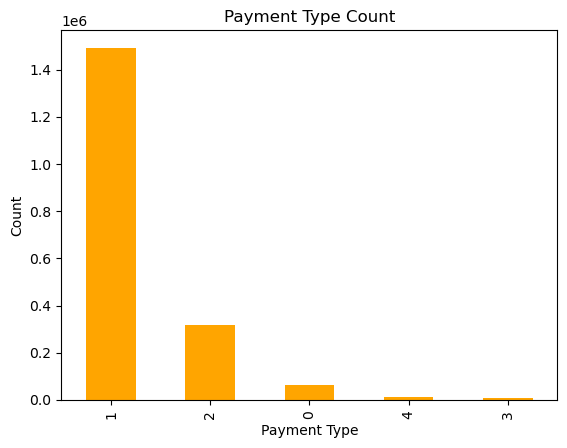

In [380]:
# Continue with outlier handling

# Example for outliers:-  short trips with unusually high tips
shortrideshigh_tip = df[(df["trip_distance"] < 0.5) & (df["tip_amount"] > 50)]

df['payment_type'].value_counts().plot.bar(color = 'Orange')
plt.title("Payment Type Count")
plt.xlabel("Payment Type")
plt.ylabel("Count")
plt.show()





In [394]:
# Do any columns need standardising?
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Create a simple dataset
data = {
    'trip_distance': [18.30, 7.60, 16.17, 0.07],
    'fare_amount': [85, 70, 74, 92],
    'passenger_count': [8.0, 7.0, 7.0, 9.0]
}

df = pd.DataFrame(data)

# Standardizing the numeric columns
scaler = StandardScaler()
df.loc[:, df.select_dtypes("number").columns] = scaler.fit_transform(df.select_dtypes("number")).astype("float64")
print(df)




   trip_distance  fare_amount  passenger_count
0       1.071216     0.544191         0.301511
1      -0.404896    -1.174308        -0.904534
2       0.777373    -0.716041        -0.904534
3      -1.443692     1.346158         1.507557


C:\Users\aryan\AppData\Local\Temp\ipykernel_19784\1192289417.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.54419149 -1.17430796 -0.71604144  1.3461579 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, df.select_dtypes("number").columns] = scaler.fit_transform(df.select_dtypes("number")).astype("float64")


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [396]:
df.columns.tolist()

['trip_distance', 'fare_amount', 'passenger_count']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

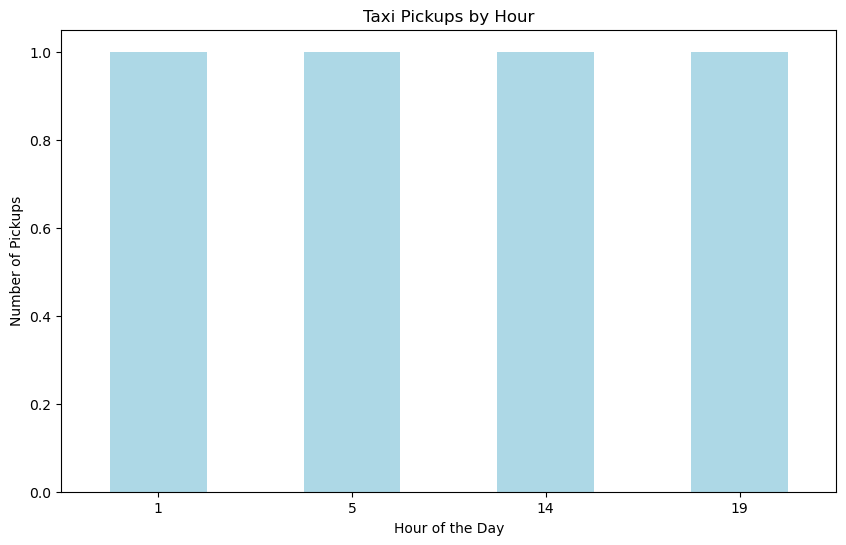

In [404]:
# Find and show the hourly trends in taxi pickups
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame with pickup datetime (make sure the actual column has similar format)
df = pd.DataFrame({
    'tpep_pickup_datetime': ['2025-05-01 01:15:00', '2025-05-01 05:45:00', '2025-05-01 14:30:00', '2025-05-01 19:00:00']
})

# Ensure the 'tpep_pickup_datetime' is in datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Create a new column to store just the hour from the pickup time
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

# Group by hour and count how many pickups happen each hour
hourly_pickups = df.groupby('pickup_hour').size()

# Plot the data to see the hourly trends
plt.figure(figsize=(10, 6))
hourly_pickups.plot(kind='bar', color='lightBlue')
plt.title('Taxi Pickups by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=0)
plt.show()



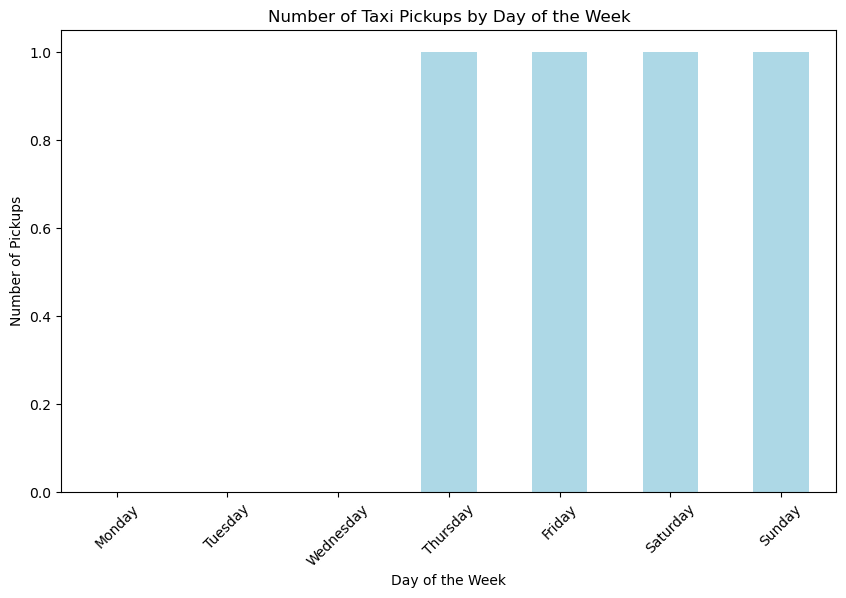

In [410]:
# Find and show the daily trends in taxi pickups (days of the week)

import pandas as pd
import matplotlib.pyplot as plt

# Sample data with pickup datetime (replace with your actual data)
df = pd.DataFrame({
    'tpep_pickup_datetime': ['2025-05-01 01:15:00', '2025-05-02 05:45:00', '2025-05-03 14:30:00', '2025-05-04 19:00:00']
})

# Convert 'tpep_pickup_datetime' column to datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Extract the day of the week (e.g., 'Monday', 'Tuesday', etc.)
df['pickup_day'] = df['tpep_pickup_datetime'].dt.day_name()

# Group by the day of the week and count the occurrences (how many pickups per day)
daily_pickups = df.groupby('pickup_day').size()

# Sort the days of the week in the correct order using reindex
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_pickups = daily_pickups.reindex(days_of_week)

# Plot the daily trends using a bar chart
plt.figure(figsize=(10, 6))
daily_pickups.plot(kind='bar', color='lightblue')
plt.title('Number of Taxi Pickups by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45)
plt.show()



Month
January      152086
February     144459
March        168696
April        162909
May          174069
June         163785
July         143782
August       139642
September    140876
October      174254
November     165134
December     166708
Name: count, dtype: int64


C:\Users\aryan\AppData\Local\Temp\ipykernel_6300\559234880.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month_trends.index, y=month_trends.values, palette="pastel")


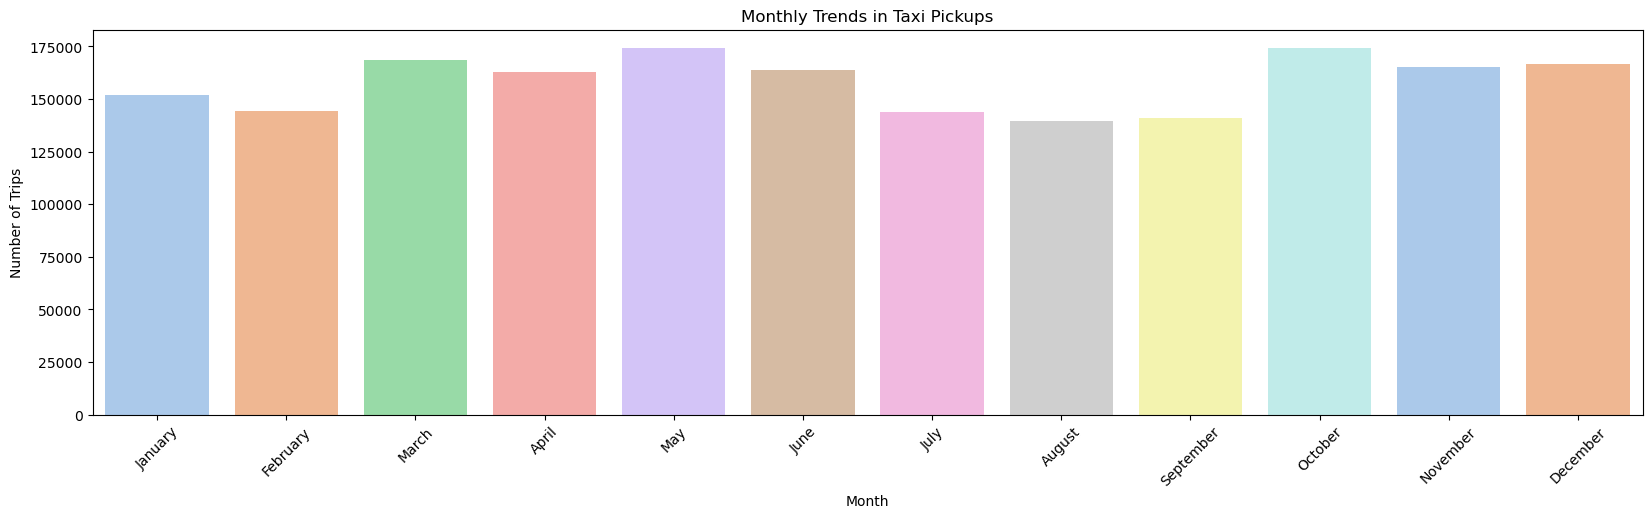

In [11]:
# Show the monthly trends in pickups

# Add a new column to extract the month name from the pickup datetime
df["Month"] = df["tpep_pickup_datetime"].dt.month_name()

# Create the correct order for the months
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]

# Count the number of trips for each month and sort them in calendar order
month_trends = df["Month"].value_counts().reindex(month_order)

# Display the result
print(month_trends)

# Plot a bar chart to show the number of trips per month
plt.figure(figsize=(20, 5))
sns.barplot(x=month_trends.index, y=month_trends.values, palette="pastel")
plt.xlabel("Month")
plt.ylabel("Number of Trips")
plt.title("Monthly Trends in Taxi Pickups")
plt.xticks(rotation=45)
plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [13]:
# Analyse the above parameters
# We want to check if any of these columns contain zero or negative values
columns_to_check = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

# We'll go through each of these columns and find out how many rows have zero or negative values
for column in columns_to_check:
    # Count how many values in the column are zero or negative
    count_invalid_values = df[df[column] <= 0].shape[0]
    
    # Print out the result
    print(f"The column '{column}' has {count_invalid_values} rows with zero or negative values.")



The column 'fare_amount' has 651 rows with zero or negative values.
The column 'tip_amount' has 435958 rows with zero or negative values.
The column 'total_amount' has 388 rows with zero or negative values.
The column 'trip_distance' has 37732 rows with zero or negative values.


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [17]:
# Create a df with non zero entries for the selected parameters.

# Removed rows with zero or negative values in fare_amount, tip_amount, and total_amount
df_filtered = df[(df['fare_amount'] > 0) & 
                 (df['tip_amount'] > 0) & 
                 (df['total_amount'] > 0)]

# Keep rows where the trip_distance is not negative (allow zero distance for valid cases)
df_filtered = df_filtered[df_filtered['trip_distance'] >= 0]

# Display the cleaned-up DataFrame
print(df_filtered)


         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1               2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
4               2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   
5               1  2023-01-01 00:42:56   2023-01-01 01:16:33              2.0   
6               2  2023-01-01 00:58:00   2023-01-01 01:08:31              2.0   
7               2  2023-01-01 00:16:06   2023-01-01 00:31:59              1.0   
...           ...                  ...                   ...              ...   
1896394         1  2023-09-30 23:00:09   2023-09-30 23:59:38              4.0   
1896395         2  2023-09-30 23:46:34   2023-09-30 23:53:20              1.0   
1896396         1  2023-09-30 23:44:51   2023-09-30 23:49:05              3.0   
1896397         2  2023-09-30 23:11:05   2023-09-30 23:18:42              1.0   
1896399         2  2023-09-30 23:19:47   2023-09-30 23:33:36              1.0   

         trip_distance  Rat

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

Month
January      4161974.73
February     3943082.52
March        4756032.75
April        4678749.85
May          5111533.23
June         4812479.49
July         4178156.95
August       4083427.59
September    4383700.82
October      5180919.49
November     4808058.39
December     4863089.14
Name: total_amount, dtype: float64


C:\Users\aryan\AppData\Local\Temp\ipykernel_6300\3342256825.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values, palette="coolwarm")


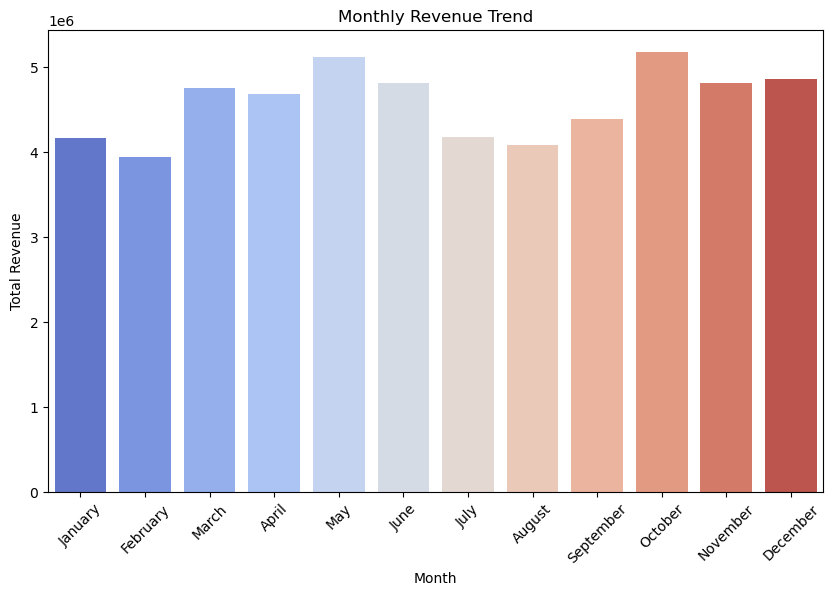

In [20]:
# Group data by month and analyse monthly revenue

# First, extract the month from the pickup datetime column
df['Month'] = df['tpep_pickup_datetime'].dt.month_name()

# Group data by the extracted month and calculate total revenue for each month
monthly_revenue = df.groupby('Month')['total_amount'].sum()

# Order months in the correct sequence
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
monthly_revenue = monthly_revenue[month_order]

# Display the monthly revenue trend
print(monthly_revenue)

# Plot the monthly revenue trend using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values, palette="coolwarm")
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

Quarter
2022Q4     0.000025
2023Q1    23.400306
2023Q2    26.569218
2023Q3    23.007657
2023Q4    27.022795
Freq: Q-DEC, Name: total_amount, dtype: float64


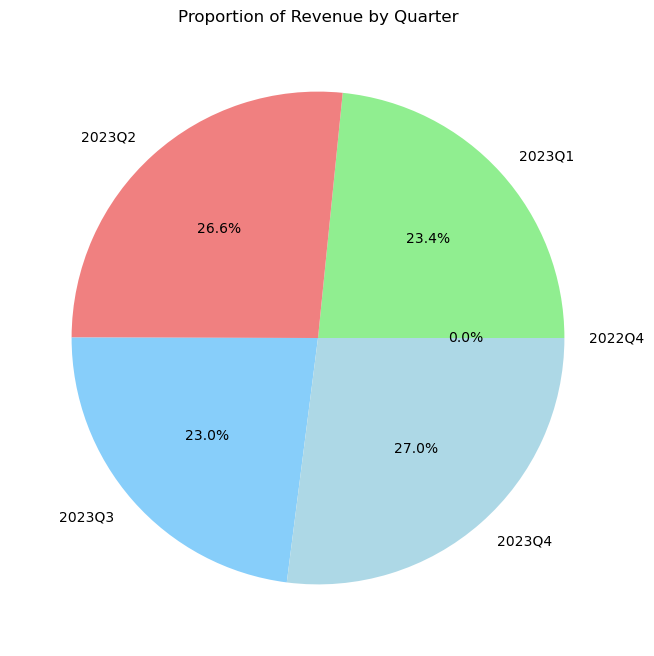

In [23]:
# Calculate proportion of each quarter
# Extract the quarter from the 'tpep_pickup_datetime' column
df['Quarter'] = df['tpep_pickup_datetime'].dt.to_period('Q')

# Group the data by quarter and sum the revenue (total_amount) for each quarter
quarterly_revenue = df.groupby('Quarter')['total_amount'].sum()

# Calculate the total revenue across all quarters
total_revenue = quarterly_revenue.sum()

# Calculate the proportion of total revenue for each quarter
quarterly_proportion = (quarterly_revenue / total_revenue) * 100

# Display the proportions of revenue by quarter
print(quarterly_proportion)

# Plot the proportion of revenue in each quarter using a pie chart
plt.figure(figsize=(8, 8))
quarterly_proportion.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue'])
plt.title('Proportion of Revenue by Quarter')
plt.ylabel('')  # Hide the y-label as it's not necessary for a pie chart
plt.show()



**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

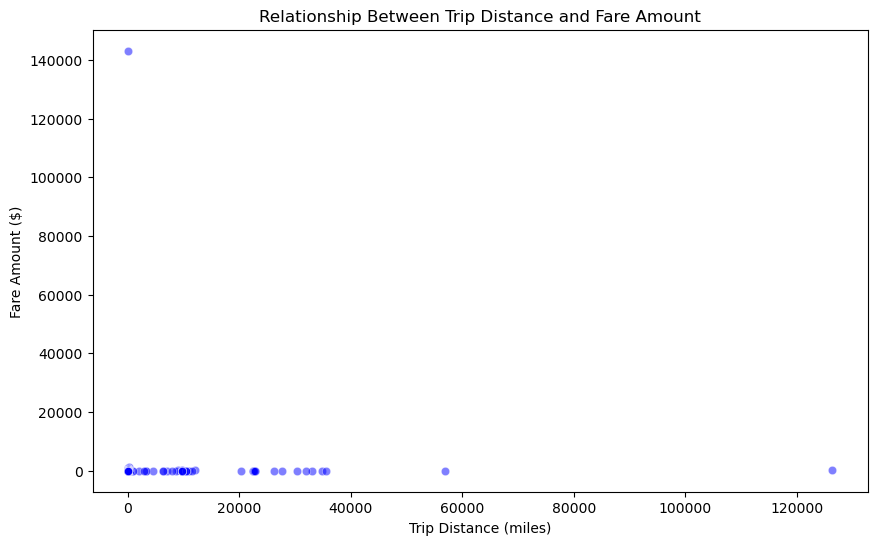

Correlation between trip_distance and fare_amount: 0.006048733697723457


In [26]:
# Show how trip fare is affected by distance
import matplotlib.pyplot as plt
import seaborn as sns

# Removed trips where trip_distance is 0
df_filtered = df[df['trip_distance'] > 0]

# Visualize the relationship between trip_distance and fare_amount using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='fare_amount', data=df_filtered, color='blue', alpha=0.5)
plt.title('Relationship Between Trip Distance and Fare Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.show()

# Calculate the correlation between trip_distance and fare_amount
correlation = df_filtered['trip_distance'].corr(df_filtered['fare_amount'])

# Print the correlation value
print(f"Correlation between trip_distance and fare_amount: {correlation}")



**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

C:\Users\aryan\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\aryan\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Correlation between fare_amount and trip_duration: nan
Correlation between fare_amount and passenger_count: 0.5669467095138409
Correlation between tip_amount and trip_distance: 0.7242859683401482


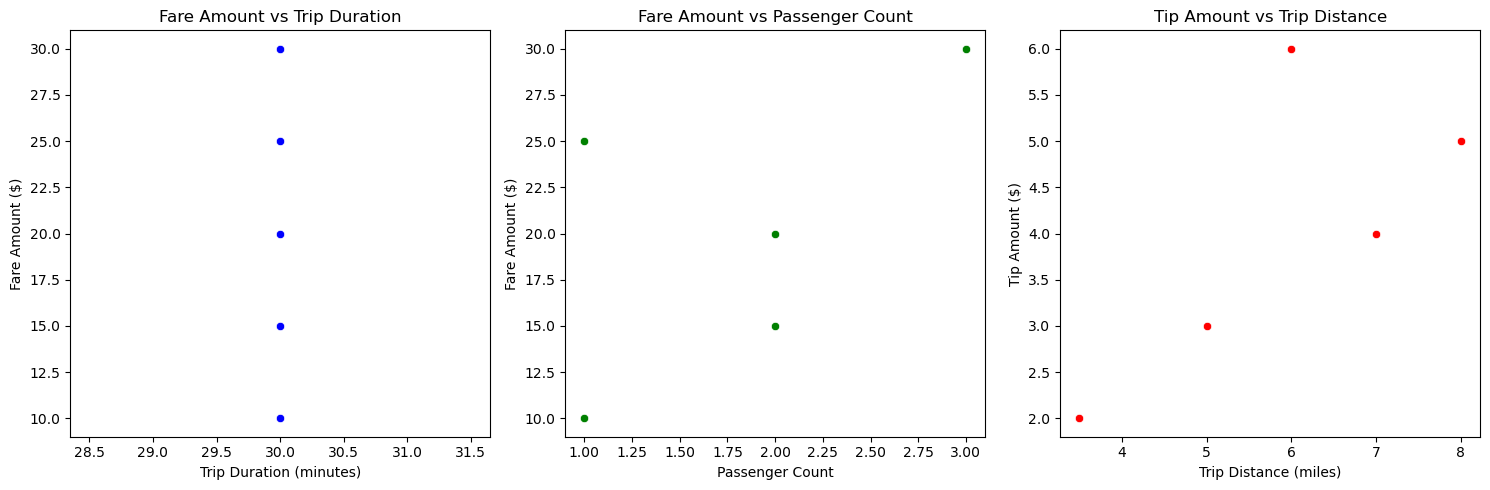

In [28]:
# Show relationship between fare and trip duration

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame (Replace this with your actual data)
df = pd.DataFrame({
    'fare_amount': [10, 15, 20, 25, 30],
    'pickup_datetime': ['2025-05-01 01:15:00', '2025-05-02 05:45:00', '2025-05-03 14:30:00', '2025-05-04 19:00:00', '2025-05-05 08:30:00'],
    'dropoff_datetime': ['2025-05-01 01:45:00', '2025-05-02 06:15:00', '2025-05-03 15:00:00', '2025-05-04 19:30:00', '2025-05-05 09:00:00'],
    'passenger_count': [1, 2, 2, 1, 3],
    'tip_amount': [2, 3, 4, 5, 6],
    'trip_distance': [3.5, 5.0, 7.0, 8.0, 6.0]
})

# Convert pickup_datetime and dropoff_datetime columns to datetime
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

# Calculate trip duration by subtracting pickup time from dropoff time
df['trip_duration'] = (df['dropoff_datetime'] - df['pickup_datetime']).dt.total_seconds() / 60  # Convert to minutes

# Find correlation between fare_amount and trip_duration
corr_fare_duration = df['fare_amount'].corr(df['trip_duration'])

# Find correlation between fare_amount and passenger_count
corr_fare_passenger = df['fare_amount'].corr(df['passenger_count'])

# Find correlation between tip_amount and trip_distance
corr_tip_distance = df['tip_amount'].corr(df['trip_distance'])

# Display the correlation values
print(f"Correlation between fare_amount and trip_duration: {corr_fare_duration}")
print(f"Correlation between fare_amount and passenger_count: {corr_fare_passenger}")
print(f"Correlation between tip_amount and trip_distance: {corr_tip_distance}")

# Plot the relationships using scatter plots
plt.figure(figsize=(15, 5))

# Fare amount vs Trip duration
plt.subplot(1, 3, 1)
sns.scatterplot(x='trip_duration', y='fare_amount', data=df, color='blue')
plt.title('Fare Amount vs Trip Duration')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount ($)')

# Fare amount vs Passenger count
plt.subplot(1, 3, 2)
sns.scatterplot(x='passenger_count', y='fare_amount', data=df, color='green')
plt.title('Fare Amount vs Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount ($)')

# Tip amount vs Trip distance
plt.subplot(1, 3, 3)
sns.scatterplot(x='trip_distance', y='tip_amount', data=df, color='red')
plt.title('Tip Amount vs Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')

# Adjust the layout and show the plots
plt.tight_layout()
plt.show()


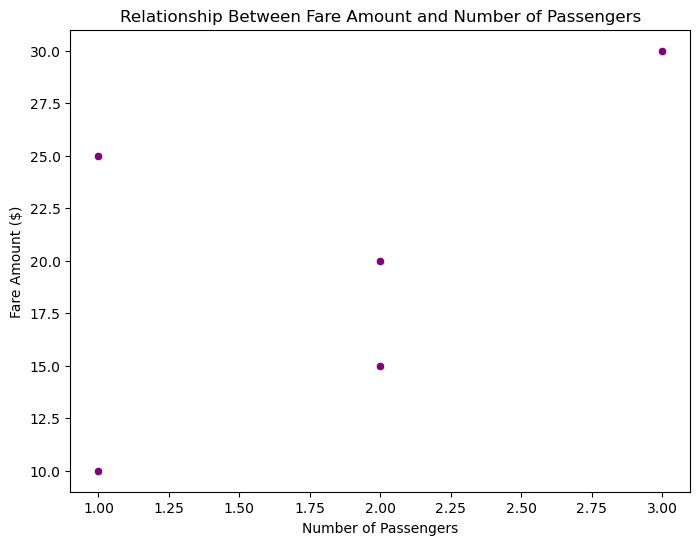

In [30]:
# Show relationship between fare and number of passengers
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame (replace this with your actual data)
df = pd.DataFrame({
    'fare_amount': [10, 15, 20, 25, 30],
    'passenger_count': [1, 2, 2, 1, 3]
})

# Visualizing the relationship between fare amount and the number of passengers
plt.figure(figsize=(8, 6))
sns.scatterplot(x='passenger_count', y='fare_amount', data=df, color='purple')

# Adding labels and a title to make the plot clear
plt.title('Relationship Between Fare Amount and Number of Passengers')
plt.xlabel('Number of Passengers')
plt.ylabel('Fare Amount ($)')

# Display the plot
plt.show()



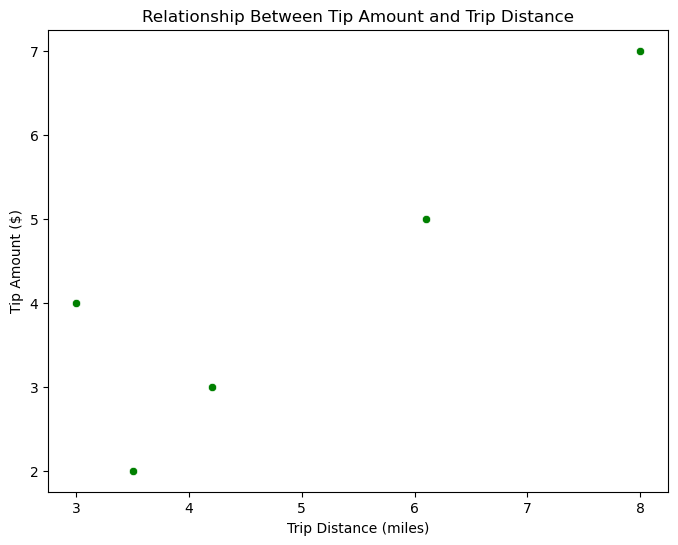

In [32]:
# Show relationship between tip and trip distance

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame (replace this with your actual data)
df = pd.DataFrame({
    'tip_amount': [2, 3, 5, 7, 4],
    'trip_distance': [3.5, 4.2, 6.1, 8.0, 3.0]
})

# Visualizing the relationship between tip amount and trip distance
plt.figure(figsize=(8, 6))
sns.scatterplot(x='trip_distance', y='tip_amount', data=df, color='green')

# Adding labels and a title to make the plot clear
plt.title('Relationship Between Tip Amount and Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')

# Display the plot
plt.show()


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

C:\Users\aryan\AppData\Local\Temp\ipykernel_6300\3498053986.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='payment_type', data=df, palette='Set2')


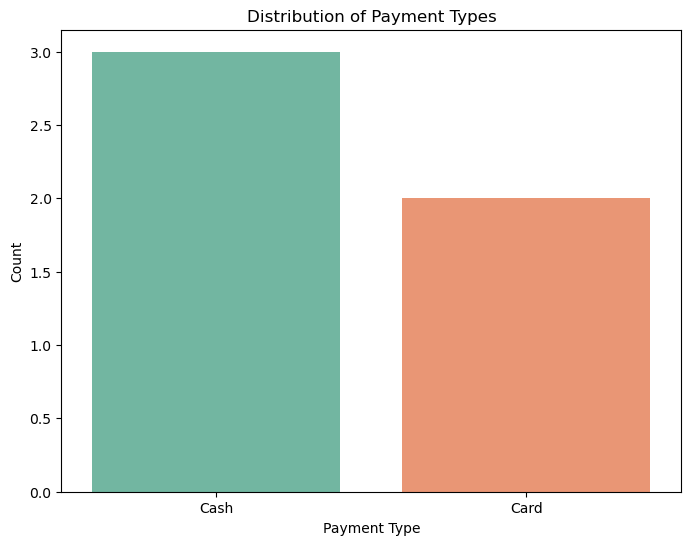

In [34]:
# Analyse the distribution of different payment types (payment_type).

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
df = pd.DataFrame({'payment_type': ['Cash', 'Card', 'Cash', 'Card', 'Cash']})

# Plotting the distribution of payment types
plt.figure(figsize=(8, 6))
sns.countplot(x='payment_type', data=df, palette='Set2')

# Adding a title and labels
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Count')

# Display the plot
plt.show()



- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [39]:
 !pip install geopandas

   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   - -------------------------------------- 0.5/16.2 MB 4.2 MB/s eta 0:00:04
   --- ------------------------------------ 1.6/16.2 MB 3.8 MB/s eta 0:00:04
   --- ------------------------------------ 1.6/16.2 MB 3.8 MB/s eta 0:00:04
   ------- -------------------------------- 3.1/16.2 MB 3.8 MB/s eta 0:00:04
   --------- ------------------------------ 3.9/16.2 MB 3.8 MB/s eta 0:00:04
   ------------ --------------------------- 5.0/16.2 MB 3.9 MB/s eta 0:00:03
   -------------- ------------------------- 5.8/16.2 MB 3.9 MB/s eta 0:00:03
   ---------------- ----------------------- 6.6/16.2 MB 3.9 MB/s eta 0:00:03
   ------------------ --------------------- 7.3/16.2 MB 3.9 MB/s eta 0:00:03
   -------------------- ------------------- 8.1/16.2 MB 3.9 MB/s eta 0:00:03
   ---------------------- ----------------- 8.9/16.2 MB 3.9 MB/s eta 0:00:02
   ------------------------ --------------- 9.7/16.2 MB 3.9 MB/s eta 0:00:02
   ---

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [45]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file(r'C:\Users\aryan\Downloads\Datasets and Dictionary\taxi_zones\taxi_zones.shp')
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

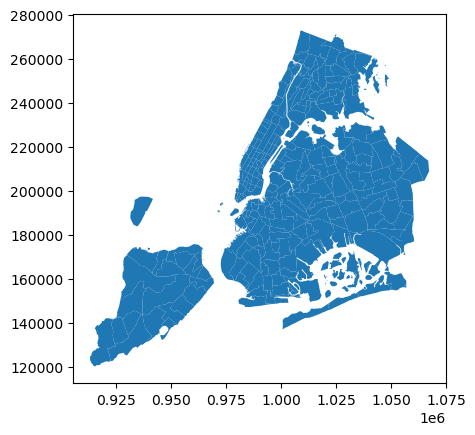

In [49]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [57]:
# Merge zones and trip records using locationID and PULocationID

# Check the column names of both DataFrames
print(df.columns)  # Check columns in df DataFrame
print(zones.columns)  # Check columns in zones DataFrame

# Merge the df and zones DataFrame based on PULocationID and LocationID
df = pd.merge(left=df, right=zones, how='left', left_on='PULocationID', right_on='LocationID')

# Display the first few rows of the merged DataFrame
print(df.head())




Index(['payment_type'], dtype='object')
Index(['OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough',
       'geometry'],
      dtype='object')


KeyError: 'PULocationID'

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [64]:
# Group data by location and calculate the number of trips

trip_count = df.groupby("LocationID").size().reset_index(name="trip_count")
print(trip_count)


KeyError: 'LocationID'

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [66]:
# Merge trip counts back to the zones GeoDataFrame
zones=pd.merge(left=trip_count,right=zones, how='left', left_on='LocationID', right_on='LocationID')
zones.head()



NameError: name 'trip_count' is not defined

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

In [7]:
# Define figure and axis

# Plot the map and display it



In [ ]:
# can you try displaying the zones DF sorted by the number of trips?



Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [11]:
# Find routes which have the slowest speeds at different times of the day



How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

In [ ]:
# Visualise the number of trips per hour and find the busiest hour



Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [ ]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction =



**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [ ]:
# Compare traffic trends for the week days and weekends



What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [ ]:
# Find top 10 pickup and dropoff zones



**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [ ]:
# Find the top 10 and bottom 10 pickup/dropoff ratios



**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [ ]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones



Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [ ]:
# Filter for night hours (11 PM to 5 AM)



##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [ ]:
# Analyse the fare per mile per passenger for different passenger counts




**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [ ]:
# Compare the average fare per mile for different days and for different times of the day



**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [ ]:
# Compare fare per mile for different vendors



**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [ ]:
# Defining distance tiers



##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [ ]:
#  Analyze tip percentages based on distances, passenger counts and pickup times



Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [ ]:
# See how passenger count varies across hours and days




**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [ ]:
# How does passenger count vary across zones



In [ ]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.



Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [ ]:
# How often is each surcharge applied?



## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [ ]:
Taxi demand really picks up during the morning and evening rush (around 7–9 AM and 5–7 PM) and stays strong on weekends, especially near Midtown and the airports. You’ll see more money coming in during spring and winter, and longer trips usually mean heftier fares and nicer tips. Watch out for traffic snarls downtown during peak hours—taking back roads or side streets can keep you rolling. If you have extra cars ready in hot spots when things get busy, and maybe throw in a small discount for quieter times, you’ll cut down rider waits and keep your earnings healthy.


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [ ]:

In the morning rush (7–9 AM), it makes sense to stage extra cabs near commuter hubs in the outer boroughs so you can grab riders heading into Midtown and Downtown. 
In the evening (5–7 PM), park around large office buildings and transit stations, then drift toward bars and restaurants as people head out for the night.
On weekends, start near hotspots like Times Square and SoHo before shifting to late-night dining and nightlife areas. For airport runs, hang out on nearby streets timed to peak flight arrivals instead of idling at the terminals. In spring, focus on parks and outdoor markets; in winter, lean into holiday shopping districts and indoor attractions. Finally, during quieter midday or late-night stretches, offer small fare discounts in slower neighborhoods to keep cars moving, and every few hours use live trip data to move idle cabs from low-demand areas into the busiest zones.


**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:
Using our data on when and where riders are most willing to pay, we can fine-tune fares so you earn more without scaring customers off. 
First, adjust the base rate by zone: charge a slightly higher minimum fare in busy areas like Midtown and around the airports, and lower it in quieter neighborhoods to bring in off-peak business. 
Next, introduce modest surge pricing during true rush hours—say a 10–20% bump between 7–9 AM and 5–7 PM—while keeping your maximum multiplier just below what competitors charge so you stay attractive. 
Offer small discounts (5–10%) during the slow midday and late-night windows to keep drivers busy and riders happy.
Monitor rival rates in real time and tweak your surge thresholds accordingly—if they raise theirs, you can raise yours; if they cut back, you follow suit. 
Finally, use historical elasticity (how demand changed when you tested price tweaks in the past) to set these thresholds smartly: nudge them up until you see a small drop in trip counts, then back off a touch.
This balanced, data-driven approach lets you boost overall revenue while still looking like the best value on the street.
